# Temp Data Analysis


These are essentials for running the program. This Notebook is for analyzing temperature data from RCP8.5 projections.
The csv of data being ran should have year values in the first column headed year. This is essential for the program to run properly.

In [1]:
#initiate Model
using CSV
using DataFrames
using Plots
using KernelDensity


After initiating the packages we will use we need to open and read the data.

In [2]:
dft85 = CSV.read("dataFiles/RCP85/updated_projections_temperature_RCP85_sneasybrick.csv", DataFrame)
dft60 = CSV.read("dataFiles/RCP60/updated_projections_temperature_RCP60_sneasybrick.csv", DataFrame)
dft45 = CSV.read("dataFiles/RCP45/updated_projections_temperature_RCP45_sneasybrick.csv", DataFrame)
dft26 = CSV.read("dataFiles/RCP26/updated_projections_temperature_RCP26_sneasybrick.csv", DataFrame)

dfg26 = CSV.read("dataFiles/RCP26/updated_projections_gmsl_RCP26_sneasybrick.csv", DataFrame)
dfg45 = CSV.read("dataFiles/RCP45/updated_projections_gmsl_RCP45_sneasybrick.csv", DataFrame)
dfg60 = CSV.read("dataFiles/RCP60/updated_projections_gmsl_RCP60_sneasybrick.csv", DataFrame)
dfg85 = CSV.read("dataFiles/RCP85/updated_projections_gmsl_RCP85_sneasybrick.csv", DataFrame)

pj = CSV.read("dataFiles/component_csv/projections_gmsl_t3_yr2100.csv", DataFrame)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.177794,-0.180469,-0.29796,-0.233172,-0.174405,-0.183554,-0.207515,-0.192877,-0.166085,-0.160087,-0.165677,-0.189367,-0.0787807,-0.176693,-0.111222,-0.226678,-0.165386,-0.171196,-0.20397,-0.248293,-0.18881,-0.189503,-0.28459,-0.181515,-0.200444,-0.0658338,-0.174809,-0.212849,-0.118965,-0.15542,-0.209149,-0.146497,-0.196586,-0.181969,-0.147082,-0.143318,-0.234206,-0.214569,-0.185255,-0.16529,-0.276743,-0.167905,-0.186779,-0.167984,-0.217241,-0.249262,-0.217882,-0.214902,-0.30745,-0.170948,-0.115774,-0.204961,-0.236142,-0.183175,-0.136627,-0.128963,-0.113979,-0.281082,-0.254173,-0.277482,-0.186155,-0.28258,-0.135045,-0.134803,-0.198336,-0.220668,-0.271683,-0.21346,-0.225744,-0.158866,-0.252798,-0.228004,-0.104896,-0.260891,-0.238491,-0.206205,-0.226817,-0.235583,-0.213579,-0.136101,-0.160712,-0.128346,-0.189457,-0.205276,-0.192845,-0.245949,-0.252454,-0.200085,-0.196539,-0.233466,-0.214217,-0.135426,-0.168007,-0.214475,-0.113308,-0.204504,-0.109075,-0.230322,-0.0642265,-0.231958,⋯
2,-0.168088,-0.223932,-0.248422,-0.218211,-0.150753,-0.125553,-0.250325,-0.245895,-0.213232,-0.160422,-0.159001,-0.18955,-0.109907,-0.193994,-0.130347,-0.223114,-0.222594,-0.145502,-0.150199,-0.227672,-0.235076,-0.14504,-0.226316,-0.153275,-0.168846,-0.103049,-0.223389,-0.199275,-0.201831,-0.17529,-0.160117,-0.185734,-0.226753,-0.14229,-0.151484,-0.177248,-0.252636,-0.217727,-0.197727,-0.243636,-0.219129,-0.215513,-0.20591,-0.202954,-0.247653,-0.258503,-0.234194,-0.22561,-0.233391,-0.202538,-0.162309,-0.224204,-0.21617,-0.228827,-0.199112,-0.138875,-0.164328,-0.237951,-0.254703,-0.20962,-0.195453,-0.217859,-0.183358,-0.125539,-0.215196,-0.241314,-0.23635,-0.254726,-0.20128,-0.127284,-0.243245,-0.166433,-0.141013,-0.21789,-0.191525,-0.230627,-0.229288,-0.225309,-0.207061,-0.174876,-0.223636,-0.172248,-0.253029,-0.170256,-0.234537,-0.225518,-0.222763,-0.180734,-0.289476,-0.20419,-0.244351,-0.167233,-0.180095,-0.176864,-0.0861539,-0.234212,-0.160344,-0.20671,-0.111555,-0.201751,⋯
3,-0.186708,-0.200245,-0.2199,-0.205584,-0.153433,-0.123197,-0.209201,-0.211247,-0.223947,-0.136569,-0.145334,-0.191085,-0.114816,-0.160381,-0.0832098,-0.245857,-0.16899,-0.158765,-0.187886,-0.234302,-0.236813,-0.114606,-0.182323,-0.181232,-0.225049,-0.106287,-0.223257,-0.255069,-0.155821,-0.160831,-0.178793,-0.161013,-0.270036,-0.214417,-0.187165,-0.195009,-0.22958,-0.198826,-0.164307,-0.261858,-0.236797,-0.186428,-0.247913,-0.261213,-0.209144,-0.215773,-0.215391,-0.248331,-0.239215,-0.228275,-0.143263,-0.194099,-0.199475,-0.200317,-0.190415,-0.173548,-0.180871,-0.191679,-0.17831,-0.250949,-0.17395,-0.207539,-0.154837,-0.101622,-0.22747,-0.235885,-0.251939,-0.244981,-0.235337,-0.155464,-0.240456,-0.225135,-0.115415,-0.227836,-0.219096,-0.254347,-0.209869,-0.208211,-0.199475,-0.164406,-0.178692,-0.

## Primary Run

First we set our index variables.

In [3]:
colr = collect(2:ncol(dft85))
rowr = collect(1:nrow(dft85))

451-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
 443
 444
 445
 446
 447
 448
 449
 450
 451

Then we solve for when find the rows within the timeframe of the years selected.

In [4]:
#create array list to house all years within the norm period
normp = []
#set normalization period
for r in rowr
    if 1850 <= dft85[r,:year] <= 1900
        push!(normp, r)
    end
end 

Next, we index through each temperature of the n ormalization period for each trial and collect their value.

In [5]:
# Set the index and array to solve for normalized value
sarray = []
i = 0

# Add each value to a sum
for r in normp
    for c in colr
        push!(sarray, dft85[r, c])
        i += 1
    end
end
sarray[1]

-0.031582453

Next we find the mean.

In [6]:
# Collect the sum
summ = 0
for t in collect(1:i)
    summ += sarray[t]
end
# Divide by the number of terms(i)
avg = summ / i


-0.03030344187909853

Next we noramlize the data for each instance.

In [7]:
# change the value for each instance after the first 50 years
for r in rowr
    for c in colr
        dft85[r, c] = (dft85[r, c] - avg)
    end
end
dft85

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.00127901,0.0358651,0.00658736,0.00310391,-0.156565,-0.232298,0.0244832,-0.0778929,0.0253276,0.187936,0.0632288,0.0185737,-0.0477839,-0.12838,0.126856,-0.303417,0.043422,-0.153661,-0.0928713,0.212241,-0.196354,-0.225047,-0.204856,-0.0420353,0.031684,0.00931942,0.189716,-0.268691,-0.155151,0.0266548,-0.230653,-0.120558,-0.0454255,-0.194665,-0.148334,0.011099,0.0124601,0.0374671,0.144434,-0.0242696,0.155668,-0.00620622,0.0560844,-0.345756,-0.104353,-0.138873,0.0125091,-0.172969,0.00882713,0.0746064,-0.00508793,-0.113978,0.189187,-0.144869,0.0290631,-0.112723,-1.69641e-5,-0.0467699,0.021851,-0.124746,0.0946669,-0.0554121,0.101555,-0.00826186,0.0752535,-0.0660762,0.180156,0.267272,-0.00919001,0.138356,0.0346889,0.298325,-0.139498,-0.187392,-0.00310008,-0.012968,-0.0215372,0.0699116,0.000179953,-0.202058,0.16192,-0.115986,0.0887452,0.0447463,0.0350296,-0.161291,0.00736523,-0.0199946,0.0684137,0.0440757,0.125476,-0.0890807,-0.0286312,-0.224802,0.020553,-0.0209601,-0.0906909,0.0683625,0.100629,⋯
2,1851,0.0845733,-0.111099,0.0312623,-0.0815236,-0.102852,-0.00851698,-0.199791,-0.00483495,0.0503991,0.0782521,-0.0363666,0.210851,-0.112583,-0.0849339,-0.114513,-0.0131476,-0.0562172,0.133431,-0.0109924,-0.142479,0.0320473,-0.0733278,-0.125961,-0.150361,-0.106962,0.140841,-0.053501,-0.122074,0.0491877,0.0394288,0.0793141,0.27556,0.107224,0.0494065,-0.0982043,0.0555547,0.129098,-0.0138965,0.213459,0.060228,0.208057,0.187504,0.127109,0.0419113,-0.0592576,0.215255,-0.0760446,-0.0377472,0.0923466,0.12351,0.206616,0.154361,0.106259,0.116615,-0.0417101,-0.138767,0.0250416,-0.162047,0.0281971,0.210899,0.0489131,0.0255471,0.0122194,-0.103204,0.12267,0.222288,-0.0408698,0.100867,-0.237198,-0.226117,0.074668,0.0885353,0.255235,-0.373779,-0.0558185,0.132027,0.192179,-0.058178,0.0238914,-0.132477,-0.0719044,0.0591793,0.356787,0.109591,0.164513,-0.0627123,0.143743,0.0521044,0.0826461,0.139443,0.114011,0.106106,0.18857,-0.108458,0.248456,0.414415,-0.0239451,0.0144482,0.264923,⋯
3,1852,0.0406614,-0.0790225,0.0706668,0.0801665,0.144949,-0.0701197,-0.00965145,-0.130498,0.0736746,0.0512229,-0.0448693,-0.139508,0.0179973,0.0124866,0.190737,-0.228825,0.332906,0.172548,0.0776651,0.00568321,0.0136767,-0.0596782,0.0266632,0.130348,-0.130006,0.0584467,0.119106,0.0620339,0.293425,-0.0430635,0.0297134,0.0797209,0.195181,-0.178338,0.0709624,-0.0117298,0.0854815,0.00846759,0.149486,-0.0128581,0.161684,-0.103063,0.0590124,-0.160905,0.0273115,0.0237913,-0.225469,-0.100487,-0.159032,0.237835,-0.209879,0.099518,0.0564854,-0.0593627,0.15259,0.244781,-0.0603517,-0.0193528,0.283954,0.252759,0.0136159,0.136335,0.0609605,-0.00126869,0.0332318,-0.146745,-0.116449,0.0181442,0.0637925,-0.243152,-0.0983651,0.111741,-0.0729404,-0.0334264,0.108496,0.0887805,0.151247,0.220564,-0.0283644,-0.179567,0.

Now to prep for graphing we create a empty dict to hold all the results each year.

In [8]:
yearVals = Dict{Any, Any}()
print("Dict values = ", yearVals)

Dict values = Dict{Any, Any}()

Next we determine the year 2100 in the df.

In [9]:
#Set year we are looking for and initiate row
yr = 2100
rw = 0
#claculate what row we are looking for
for r in rowr
    if dft85[r,:year] == yr
        rw = r
    end
end
rw

251

Now we store all the values from that row into the yearVals Dict

In [10]:
x2100 = []
for c in colr
    push!(x2100, dft85[rw, c])
end
x2100

10000-element Vector{Any}:
 4.940058832879099
 3.2554046718790985
 4.472642827879098
 5.492420418879099
 4.192914710879099
 4.1722702778790985
 3.8777005718790987
 3.7875448228790987
 4.631302627879099
 3.8473599688790987
 ⋮
 4.2813712248790985
 3.9148311238790985
 4.829255460879098
 4.228298333879098
 3.7357581708790986
 4.682069538879099
 4.410863731879099
 4.9634468988790985
 5.348214252879099

Make the histogram.

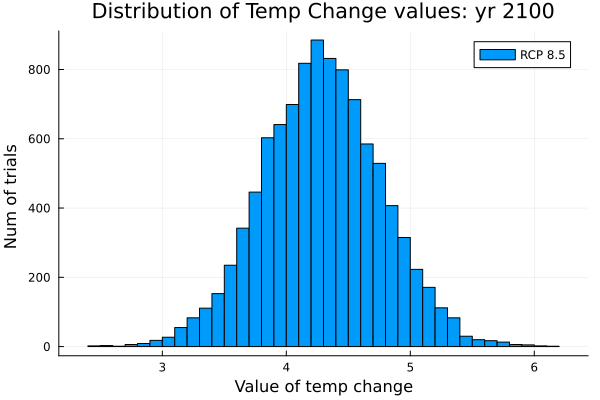

In [11]:

histogram(x2100, label = "RCP 8.5")
title!("Distribution of Temp Change values: yr 2100")
xlabel!("Value of temp change")
ylabel!("Num of trials ")
     

## Generalization of Primary

general function to do all of this.

In [12]:
function genp(dft, yr, ns, ne)
    #set boundaries
    colr = collect(2:ncol(dft))
    rowr = collect(1:nrow(dft))

    #create array list to house all years within the norm period
    normp = []
    #set normalization period
    for r in rowr
        if ns <= dft[r,:year] <= ne
            push!(normp, r)
        end
    end
    
    # Set the index and array to solve for normalized value
    sarray = []
    i = 0

    # Add each value to a sum
    for r in normp
        for c in colr
            push!(sarray, dft[r, c])
            i += 1
        end
    end

    # Collect the sum
    summ = 0
    for t in collect(1:i)
        summ += sarray[t]
    end
    # Divide by the number of terms(i)
    avg = summ / i

    # change the value for each instance
    for r in rowr
        for c in colr
            dft[r, c] = (dft[r, c] - avg)
        end
    end

    #initiate row
    rw = 0
    #claculate what row we are looking for
    for r in rowr
        if dft[r,:year] == yr
            rw = r
        end
    end

    x = []
    for c in colr
        push!(x, dft[rw, c])
    end

    return x
end

genp (generic function with 1 method)

run function with different rcps for same year, create variable to house result.

In [13]:
r85 = Vector{Float64}(genp(dft85, 2100, 1850, 1900))
r60 = Vector{Float64}(genp(dft60, 2100,1850, 1900))
r45 = Vector{Float64}(genp(dft45, 2100, 1850, 1900))
r26 = Vector{Float64}(genp(dft26, 2100,1850, 1900))



10000-element Vector{Float64}:
 1.624413884149715
 1.1803164581497152
 1.5905920441497152
 1.9778548161497151
 1.3842097341497153
 1.5281925911497152
 1.271143449149715
 1.3078168041497151
 1.4967489101497151
 1.086720076149715
 ⋮
 1.5454032971497151
 1.2045314441497152
 1.6423801601497152
 1.314110672149715
 1.289012369149715
 1.5490080611497152
 1.561420141149715
 1.4934662891497152
 1.8213158621497152

Create a gen function for historgrams

In [14]:
function histg(data, rcp, tyear, op)
    darray = []
    #initiate hist array
    for t in collect(1:length(data))
        push!(darray, data[t])
    end

    #make histogram
    graph = histogram(darray, label = string("RCP ",rcp), opacity = op)
    title!(string("Distribution of Temp Change values: yr ",tyear))
    xlabel!("Value of temp change")
    ylabel!("Num of trials ")
    return graph
end

histg (generic function with 1 method)

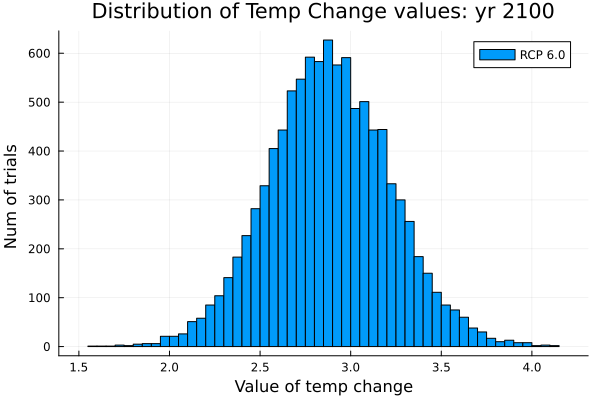

In [15]:

h4 = histg(r45, 4.5, 2100, 1)
h8 = histg(r85, 8.5, 2100, 1)
h2 = histg(r26, 2.6, 2100, 1)
h6 = histg(r60, 6.0, 2100, 1) 

In [16]:
k26 = kde(r26)
k45 = kde(r45)
k85 = kde(r85)
k60 = kde(r60)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(1.3968201324426779:0.001436560048094691:4.33745855089251, [6.824505417446503e-7, 6.772175306091199e-7, 6.815685467120858e-7, 6.955152002108278e-7, 7.191693457420101e-7, 7.527432909215648e-7, 7.965506236828901e-7, 8.510076443535297e-7, 9.166354031364676e-7, 9.940623332260756e-7  …  1.3337470506878668e-6, 1.2101480675250076e-6, 1.1019358191078493e-6, 1.0079914701463522e-6, 9.273294660563924e-7, 8.590912660491612e-7, 8.025397512951421e-7, 7.570542965087967e-7, 7.221265095579132e-7, 6.973566232543887e-7])

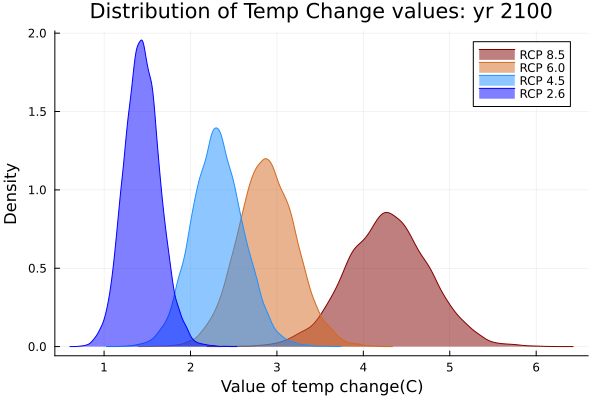

In [17]:
p = plot(k85.x, k85.density, label = "RCP 8.5", fill = (0, 0.5), color = :maroon)
plot!(p, k60.x, k60.density, label = "RCP 6.0", fill = (0, 0.5), color = :chocolate)
plot!(p, k45.x, k45.density, label = "RCP 4.5", fill = (0, 0.5), color = :dodgerblue)
plot!(p, k26.x, k26.density, label = "RCP 2.6", fill = (0, 0.5), color = :blue)
title!(string("Distribution of Temp Change values: yr 2100"))
xlabel!("Value of temp change(C)")
ylabel!("Density")




## Threshold work

### Collect Column Names

create a function to find the all trials that pass that threshold.

In [18]:


function thresh(tdf, tcha, yr_t)
    #create dict to house all colomn names and column values that pass within the threshhold
    colnames = Dict{Any, Any}()
    #set boundaries
    colr = collect(2:ncol(tdf))
    rowr = collect(1:nrow(tdf))
    # find the row for threshhold year
    tr = 0
    for r in rowr
        if tdf[r, 1] == yr_t
            tr = r
        end
    end
    # new row boundary
    rowt = collect(1:tr)

    for c in colr
        t = true
        for r in rowt
            if tdf[r, c] >= tcha
                t = false
            end
        end
        if t == true
            merge!(colnames, Dict(names(tdf, c)=> c))
        end
    end
    return colnames
end

thresh (generic function with 1 method)

Using RCP 4.5 data Check the values for 4, 3, 2, and 1.5 degree increase

In [19]:
cuatro = thresh(dft45, 4, 2100)
tres = thresh(dft45, 3, 2100)
dos = thresh(dft45, 2, 2100)
uno = thresh(dft45, 1.5, 2100)

Dict{Any, Any} with 1 entry:
  ["x9723"] => 9724

### Ready the Sealevel Rise Data

Normalize the sealevel data

In [33]:
function norm(df, ns, ne)
    #set boundaries
    colr = collect(2:ncol(df))
    rowr = collect(1:nrow(df))

    #create array list to house all years within the norm period
    normp = []
    #set normalization period
    for r in rowr
        if ns <= df[r,:year] <= ne
            push!(normp, r)
        end
    end
    
    # Set the index and array to solve for normalized value
    sarray = []
    i = 0

    # Add each value to a sum
    for r in normp
        for c in colr
            push!(sarray, df[r, c])
            i += 1
        end
    end

    # Collect the sum
    summ = 0
    for t in collect(1:i)
        summ += sarray[t]
    end
    # Divide by the number of terms(i)
    avg = summ / i
    
    # change the value for each instance
    for r in rowr
        for c in colr
            df[r, c] = (df[r, c] - avg)
        end
    end
    return df
end

norm (generic function with 1 method)

Check with sealeavel rise data

In [34]:
norm(dfg45,1995,2014)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.183045,-0.153628,-0.212337,-0.282738,-0.175591,-0.176418,-0.207475,-0.232403,-0.0927018,-0.17745,-0.239724,-0.226715,-0.127615,-0.200793,-0.212472,-0.15969,-0.170466,-0.163081,-0.119629,-0.278626,-0.177129,-0.214511,-0.212047,-0.256331,-0.15106,-0.257793,-0.220869,-0.225117,-0.203925,-0.135154,-0.143649,-0.21276,-0.209745,-0.232998,-0.213106,-0.233148,-0.124622,-0.248203,-0.15615,-0.201099,-0.170278,-0.170123,-0.146863,-0.257682,-0.206229,-0.227246,-0.174182,-0.315675,-0.12363,-0.135728,-0.23158,-0.207131,-0.148718,-0.206232,-0.17159,-0.102673,-0.204682,-0.289686,-0.203832,-0.254801,-0.223215,-0.199536,-0.252379,-0.0876231,-0.231402,-0.200019,-0.268852,-0.108853,-0.280069,-0.268632,-0.188445,-0.24316,-0.141903,-0.175459,-0.226034,-0.159864,-0.186093,-0.152633,-0.125097,-0.183699,-0.228751,-0.171242,-0.123887,-0.246513,-0.23003,-0.205758,-0.13604,-0.246968,-0.174797,-0.254776,-0.178895,-0.151032,-0.166819,-0.169672,-0.200051,-0.183521,-0.22221,-0.180854,-0.100977,⋯
2,1851,-0.196136,-0.224527,-0.212048,-0.201734,-0.247264,-0.202493,-0.136682,-0.231281,-0.125453,-0.187984,-0.222287,-0.201574,-0.162178,-0.219073,-0.187292,-0.140258,-0.234843,-0.163319,-0.179615,-0.24484,-0.229347,-0.235555,-0.187174,-0.242484,-0.171012,-0.193766,-0.230789,-0.184129,-0.216588,-0.145222,-0.129679,-0.261525,-0.241726,-0.231613,-0.161528,-0.231348,-0.165318,-0.227939,-0.20724,-0.253075,-0.20933,-0.189244,-0.171773,-0.225757,-0.199652,-0.208623,-0.244841,-0.204002,-0.110601,-0.173023,-0.242272,-0.217736,-0.095423,-0.205974,-0.142711,-0.132691,-0.190944,-0.230126,-0.214207,-0.221265,-0.232408,-0.177512,-0.209089,-0.12951,-0.217484,-0.200556,-0.232218,-0.157768,-0.22601,-0.194946,-0.173834,-0.232228,-0.225467,-0.127219,-0.272714,-0.133583,-0.225601,-0.185952,-0.183234,-0.233864,-0.191142,-0.156973,-0.182724,-0.226462,-0.199373,-0.17366,-0.190195,-0.243791,-0.193885,-0.230949,-0.26838,-0.132856,-0.223161,-0.205875,-0.198454,-0.225092,-0.198175,-0.149733,-0.146034,⋯
3,1852,-0.239892,-0.249112,-0.183426,-0.216933,-0.262892,-0.244557,-0.179288,-0.218716,-0.12405,-0.184314,-0.198007,-0.192664,-0.145378,-0.217033,-0.216369,-0.140037,-0.251808,-0.177179,-0.203209,-0.235708,-0.228785,-0.229399,-0.183031,-0.1955,-0.207699,-0.210064,-0.21515,-0.164864,-0.235388,-0.136734,-0.12915,-0.214589,-0.250704,-0.220024,-0.211132,-0.186001,-0.144374,-0.24986,-0.15566,-0.2486,-0.195626,-0.157339,-0.156575,-0.203352,-0.169917,-0.23751,-0.232498,-0.208429,-0.156711,-0.166122,-0.204422,-0.236287,-0.0926688,-0.178829,-0.143233,-0.133352,-0.217044,-0.23437,-0.22991,-0.188512,-0.18623,-0.185304,-0.244142,-0.109412,-0.233224,-0.27668,-0.185961,-0.170322,-0.256733,-0.19872,-0.128831,-0.228271,-0.168998,-0.153163,-0.198496,-0.120496,-0.260502,-0.173134,-0.171587,-0.187737,-0.16861,-0.158982,-0.20674

### Get Values and Plot

create function to get values of sealevel rise for columns underneath the threshold

In [22]:
function valu(df, cnames, tyr)
    #set boundaries
    colr = collect(2:ncol(df))
    rowr = collect(1:nrow(df))
    
    vals = [] # this will house the values

    #initiate row
    rw = 0
    #calculate what row we are looking for
    for r in rowr
        if df[r,:year] == tyr
            rw = r
        end
    end

    for i in collect(values(cnames))
        push!(vals, df[rw, i])
    end
    return vals

end

valu (generic function with 1 method)

Grab the values for the three thresholds

In [23]:
t4 = Vector{Float64}(valu(dfg45, cuatro, 2100))
t3 = Vector{Float64}(valu(dfg45, tres, 2100))
t2 = Vector{Float64}(valu(dfg45, dos, 2100))
t1 = Vector{Float64}(valu(dfg45, uno, 2100))

1-element Vector{Float64}:
 0.507915806

grab their kde

In [24]:
kd3 = kde(t3)
kd2 = kde(t2)
kd1 = kde(t1)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(-3.092084194:0.003517342452369321:4.107915806, [0.00029510134226287676, 0.00029516902195583783, 0.00029530439259098373, 0.0002955074766676502, 0.00029577830793750537, 0.0002961169314074086, 0.0002965234033437958, 0.0002969977912772592, 0.0002975401740090422, 0.0002981506416179225  …  0.0002981506416179754, 0.0002975401740089754, 0.00029699779127726573, 0.00029652340334380446, 0.000296116931407419, 0.00029577830793744205, 0.0002955074766675934, 0.00029530439259094904, 0.0002951690219557888, 0.0002951013422628694])

Plot!!!

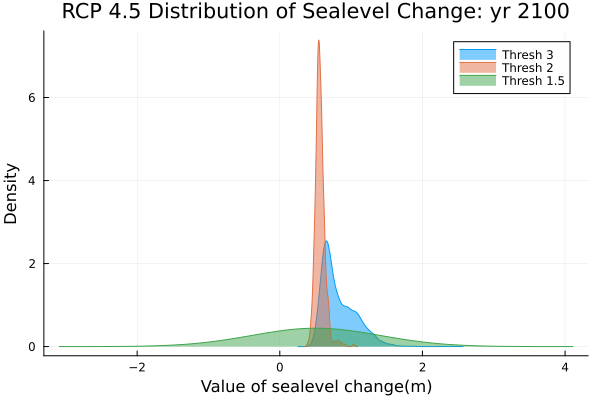

In [25]:
p = plot(kd3.x, kd3.density, label = "Thresh 3", fill = (0, 0.5))
plot!(p, kd2.x, kd2.density, label = "Thresh 2", fill = (0, 0.5))
plot!(p, kd1.x, kd1.density, label = "Thresh 1.5", fill = (0, 0.5))# wierd cuz 1.5 has just one value
title!(string("RCP 4.5 Distribution of Sealevel Change: yr 2100"))
xlabel!("Value of sealevel change(m)")
ylabel!("Density")

## Component Making

### Make Individual Components

write function to create thresh components

In [26]:
function filldf(df, r2, d2, r4, d4, r6, d6, r8, d8)
    #grab column values
    a2 = collect(values(r2))
    a4 = collect(values(r4))
    a6 = collect(values(r6))
    a8 = collect(values(r8))

    df2 = DataFrame()
    df4 = DataFrame()
    df6 = DataFrame()
    df8 = DataFrame()

    t = 1

    # fill all the values for RCP26
    for i in 1:length(a2)
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d2[j, a2[i]])
        end
        df2[!, cname] = vals
        t += 1
    end

    # same for RCP45
    for i in 1:length(a4)
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d4[j, a4[i]])
        end
        df4[!, cname] = vals
        t += 1
    end

    # same for RCP60
    for i in 1:length(a6)
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d6[j, a6[i]])
        end
        df6[!, cname] = vals
        t += 1
    end

    # same for RCP85
    for i in 1:length(a8)
        cname = "x$t"
        vals = Vector{Float64}()
        for j in 1:451
            push!(vals, d8[j, a8[i]])
        end
        df8[!, cname] = vals
        t += 1
    end

    #combining all dfs into one big one
    p1 = hcat(df2, df4)
    p2 = hcat(p1, df6)
    p3 = hcat(p2, df8)

    return p3
end
    

filldf (generic function with 1 method)

### HardCode for certain components
This is all the repeatitve things like normalizing dfs.

Find all values for all rcp scenarios

In [27]:

bar264 = thresh(dft26, 4, 2100)
bar263 = thresh(dft26, 3, 2100)
bar262 = thresh(dft26, 2, 2100)
bar261 = thresh(dft26, 1.5, 2100)

bar454 = thresh(dft45, 4, 2100)
bar453 = thresh(dft45, 3, 2100)
bar452 = thresh(dft45, 2, 2100)
bar451 = thresh(dft45, 1.5, 2100)

bar604 = thresh(dft60, 4, 2100)
bar603 = thresh(dft60, 3, 2100)
bar602 = thresh(dft60, 2, 2100)
bar601 = thresh(dft60, 1.5, 2100)

bar854 = thresh(dft85, 4, 2100)
bar853 = thresh(dft85, 3, 2100)
bar852 = thresh(dft85, 2, 2100)
bar851 = thresh(dft85, 1.5, 2100)

Dict{Any, Any}()

Norm components

In [35]:
ndfg26 = norm(dfg26,1995,2014)
ndfg45 = norm(dfg45,1995,2014)
ndfg60 = norm(dfg60,1995,2014)
ndfg85 = norm(dfg85,1995,2014)

Row,year,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,⋯
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,1850,-0.216028,-0.214405,-0.200347,-0.25293,-0.152994,-0.169183,-0.169497,-0.237098,-0.0587356,-0.186465,-0.30399,-0.253123,-0.0994862,-0.170004,-0.233832,-0.102712,-0.194182,-0.100669,-0.139637,-0.219288,-0.258032,-0.201758,-0.23346,-0.281749,-0.148135,-0.188575,-0.232719,-0.134758,-0.200561,-0.19464,-0.10629,-0.229162,-0.197578,-0.197547,-0.213567,-0.25776,-0.112406,-0.19996,-0.118946,-0.17237,-0.236877,-0.183981,-0.0882149,-0.252654,-0.164345,-0.248976,-0.160535,-0.28107,-0.187548,-0.138527,-0.254263,-0.175822,-0.185045,-0.197938,-0.162016,-0.125578,-0.187366,-0.223977,-0.205026,-0.260606,-0.190652,-0.156784,-0.245713,-0.122287,-0.210735,-0.236247,-0.253011,-0.0733457,-0.268136,-0.20352,-0.226362,-0.307676,-0.133975,-0.197497,-0.242171,-0.131499,-0.213546,-0.214793,-0.089944,-0.191873,-0.19066,-0.206459,-0.213662,-0.2326,-0.171111,-0.24147,-0.180128,-0.245802,-0.200553,-0.259762,-0.184775,-0.125339,-0.167641,-0.220272,-0.197108,-0.223178,-0.260124,-0.156257,-0.0789376,⋯
2,1851,-0.235566,-0.188784,-0.229576,-0.20648,-0.20097,-0.184238,-0.150062,-0.244399,-0.141863,-0.16136,-0.236707,-0.197987,-0.166129,-0.195095,-0.184606,-0.165897,-0.186694,-0.177222,-0.210244,-0.255982,-0.207593,-0.243755,-0.167231,-0.196906,-0.167478,-0.225403,-0.202682,-0.156815,-0.193464,-0.134968,-0.152296,-0.234871,-0.2446,-0.23397,-0.206527,-0.230433,-0.163732,-0.247734,-0.17046,-0.217053,-0.180496,-0.161086,-0.144882,-0.196171,-0.204597,-0.218917,-0.243174,-0.271703,-0.0722295,-0.135371,-0.23957,-0.219764,-0.150147,-0.186309,-0.15271,-0.173828,-0.226729,-0.230908,-0.204521,-0.201062,-0.19647,-0.204129,-0.208951,-0.152362,-0.235967,-0.251309,-0.209319,-0.152938,-0.262857,-0.19042,-0.157159,-0.223533,-0.221872,-0.141622,-0.243141,-0.12703,-0.232916,-0.213777,-0.135244,-0.177577,-0.191735,-0.182025,-0.176998,-0.233328,-0.165925,-0.175374,-0.160514,-0.199143,-0.168765,-0.239551,-0.253778,-0.157441,-0.241423,-0.210854,-0.199493,-0.242158,-0.269232,-0.129686,-0.114737,⋯
3,1852,-0.246862,-0.217226,-0.19206,-0.202528,-0.210125,-0.213294,-0.167511,-0.234338,-0.138464,-0.175171,-0.261398,-0.249498,-0.116769,-0.207399,-0.163895,-0.139954,-0.196961,-0.151276,-0.171254,-0.222101,-0.252998,-0.207264,-0.179099,-0.213558,-0.18359,-0.206642,-0.216855,-0.135892,-0.198815,-0.116222,-0.157197,-0.287611,-0.19899,-0.259417,-0.176819,-0.2156,-0.151021,-0.228777,-0.19709,-0.214204,-0.224162,-0.153166,-0.185379,-0.205609,-0.165178,-0.253218,-0.200588,-0.27502,-0.136055,-0.133506,-0.249709,-0.188109,-0.14625,-0.16813,-0.15951,-0.183649,-0.233184,-0.27105,-0.228264,-0.193645,-0.246977,-0.198857,-0.226692,-0.132881,-0.251133,-0.198045,-0.247648,-0.171791,-0.268214,-0.22115,-0.169326,-0.188037,-0.208919,-0.131499,-0.194894,-0.115905,-0.225104,-0.180639,-0.14762,-0.152707,-0.150237,-0.222198,-0.171666

empty dfs

In [29]:
gmslt1 = DataFrame()
gmslt2 = DataFrame()
gmslt3 = DataFrame()
gmslt4 = DataFrame()

0×0 DataFrame

In [36]:
pgmsl_t1 = filldf(gmslt1,bar261,ndfg26,bar451,ndfg45,bar601,ndfg60,bar851,ndfg85)
pgmsl_t2 = filldf(gmslt2,bar262,ndfg26,bar452,ndfg45,bar602,ndfg60,bar852,ndfg85)
pgmsl_t3 = filldf(gmslt3,bar263,ndfg26,bar453,ndfg45,bar603,ndfg60,bar853,ndfg85)
pgmsl_t4 = filldf(gmslt4,bar264,ndfg26,bar454,ndfg45,bar604,ndfg60,bar854,ndfg85)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.177794,-0.180469,-0.29796,-0.233172,-0.174405,-0.183554,-0.207515,-0.192877,-0.166085,-0.160087,-0.165677,-0.189367,-0.0787807,-0.176693,-0.111222,-0.226678,-0.165386,-0.171196,-0.20397,-0.248293,-0.18881,-0.189503,-0.28459,-0.181515,-0.200444,-0.0658338,-0.174809,-0.212849,-0.118965,-0.15542,-0.209149,-0.146497,-0.196586,-0.181969,-0.147082,-0.143318,-0.234206,-0.214569,-0.185255,-0.16529,-0.276743,-0.167905,-0.186779,-0.167984,-0.217241,-0.249262,-0.217882,-0.214902,-0.30745,-0.170948,-0.115774,-0.204961,-0.236142,-0.183175,-0.136627,-0.128963,-0.113979,-0.281082,-0.254173,-0.277482,-0.186155,-0.28258,-0.135045,-0.134803,-0.198336,-0.220668,-0.271683,-0.21346,-0.225744,-0.158866,-0.252798,-0.228004,-0.104896,-0.260891,-0.238491,-0.206205,-0.226817,-0.235583,-0.213579,-0.136101,-0.160712,-0.128346,-0.189457,-0.205276,-0.192845,-0.245949,-0.252454,-0.200085,-0.196539,-0.233466,-0.214217,-0.135426,-0.168007,-0.214475,-0.113308,-0.204504,-0.109075,-0.230322,-0.0642265,-0.231958,⋯
2,-0.168088,-0.223932,-0.248422,-0.218211,-0.150753,-0.125553,-0.250325,-0.245895,-0.213232,-0.160422,-0.159001,-0.18955,-0.109907,-0.193994,-0.130347,-0.223114,-0.222594,-0.145502,-0.150199,-0.227672,-0.235076,-0.14504,-0.226316,-0.153275,-0.168846,-0.103049,-0.223389,-0.199275,-0.201831,-0.17529,-0.160117,-0.185734,-0.226753,-0.14229,-0.151484,-0.177248,-0.252636,-0.217727,-0.197727,-0.243636,-0.219129,-0.215513,-0.20591,-0.202954,-0.247653,-0.258503,-0.234194,-0.22561,-0.233391,-0.202538,-0.162309,-0.224204,-0.21617,-0.228827,-0.199112,-0.138875,-0.164328,-0.237951,-0.254703,-0.20962,-0.195453,-0.217859,-0.183358,-0.125539,-0.215196,-0.241314,-0.23635,-0.254726,-0.20128,-0.127284,-0.243245,-0.166433,-0.141013,-0.21789,-0.191525,-0.230627,-0.229288,-0.225309,-0.207061,-0.174876,-0.223636,-0.172248,-0.253029,-0.170256,-0.234537,-0.225518,-0.222763,-0.180734,-0.289476,-0.20419,-0.244351,-0.167233,-0.180095,-0.176864,-0.0861539,-0.234212,-0.160344,-0.20671,-0.111555,-0.201751,⋯
3,-0.186708,-0.200245,-0.2199,-0.205584,-0.153433,-0.123197,-0.209201,-0.211247,-0.223947,-0.136569,-0.145334,-0.191085,-0.114816,-0.160381,-0.0832098,-0.245857,-0.16899,-0.158765,-0.187886,-0.234302,-0.236813,-0.114606,-0.182323,-0.181232,-0.225049,-0.106287,-0.223257,-0.255069,-0.155821,-0.160831,-0.178793,-0.161013,-0.270036,-0.214417,-0.187165,-0.195009,-0.22958,-0.198826,-0.164307,-0.261858,-0.236797,-0.186428,-0.247913,-0.261213,-0.209144,-0.215773,-0.215391,-0.248331,-0.239215,-0.228275,-0.143263,-0.194099,-0.199475,-0.200317,-0.190415,-0.173548,-0.180871,-0.191679,-0.17831,-0.250949,-0.17395,-0.207539,-0.154837,-0.101622,-0.22747,-0.235885,-0.251939,-0.244981,-0.235337,-0.155464,-0.240456,-0.225135,-0.115415,-0.227836,-0.219096,-0.254347,-0.209869,-0.208211,-0.199475,-0.164406,-0.178692,-0.

Function to Write CSV file for a component in thresholds(1.5, 2, 3, 4) will save in datafiles. Uses updated projection files with time indexes from datafiles.

In [31]:
function compwriter(title)
    # read csvs
    dfn26 = CSV.read("dataFiles/RCP26/updated_projections_$title"*"_RCP26_sneasybrick.csv", DataFrame)
    dfn45 = CSV.read("dataFiles/RCP45/updated_projections_$title"*"_RCP45_sneasybrick.csv", DataFrame)
    dfn60 = CSV.read("dataFiles/RCP60/updated_projections_$title"*"_RCP60_sneasybrick.csv", DataFrame)
    dfn85 = CSV.read("dataFiles/RCP85/updated_projections_$title"*"_RCP85_sneasybrick.csv", DataFrame)


    #empty dfs
    edf1 = DataFrame()
    edf2 = DataFrame()
    edf3 = DataFrame()
    edf4 = DataFrame()

    # norm dfns
    ndfn26 = norm(dfn26,1995,2014)
    ndfn45 = norm(dfn45,1995,2014)
    ndfn60 = norm(dfn60,1995,2014)
    ndfn85 = norm(dfn85,1995,2014)
    
    # projection dfs
    pdfn_t1 = filldf(edf1,bar261,ndfn26,bar451,ndfn45,bar601,ndfn60,bar851,ndfn85)
    pdfn_t2 = filldf(edf2,bar262,ndfn26,bar452,ndfn45,bar602,ndfn60,bar852,ndfn85)
    pdfn_t3 = filldf(edf3,bar263,ndfn26,bar453,ndfn45,bar603,ndfn60,bar853,ndfn85)
    pdfn_t4 = filldf(edf4,bar264,ndfn26,bar454,ndfn45,bar604,ndfn60,bar854,ndfn85)

    # write the csvs
    CSV.write("dataFiles/component_csv/projections_$title"*"_t15_yr2100.csv",pdfn_t1)
    CSV.write("dataFiles/component_csv/projections_$title"*"_t2_yr2100.csv",pdfn_t2)
    CSV.write("dataFiles/component_csv/projections_$title"*"_t3_yr2100.csv",pdfn_t3)
    CSV.write("dataFiles/component_csv/projections_$title"*"_t4_yr2100.csv",pdfn_t4)
end

compwriter (generic function with 1 method)

In [38]:
compwriter("gmsl")
compwriter("greenland")
compwriter("antarctic")
compwriter("glaciers")
compwriter("landwater_storage_sl")
compwriter("thermal")